# Eredivisie 2021-22 Set Pieces Visualization

### 1. Introduction

The analysis of set pieces in football has won quite some popularity within football data analysis in recent years. Often labeled as messier, clumsier and less predictable than open play, set pieces have the potential to drastically change the course of a match. All the more because football is typically a low score sport, being able to take advantage of the hectics of set pieces can provide teams with a significant bonus. In this project, we will visualize the set piece performance of the teams that played in the Dutch Eredivisie in 2021-22. Our data has been gathered from Soccerment and WhoScored.com and combined into a single dataset. Penalty kicks have been ommited from the analysis, as to emphasize team performance in throw-ins, corner kicks and free kicks.

### 2. Importing the modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### 2. Reading the data

In [2]:
gt = pd.read_csv('C:/Users/ramzy/Jupyter Notebook Projects/ed21_22_goal_types.csv')
print(gt['club'].unique())

['Ajax' 'PSV Eindhoven' 'Feyenoord' 'AZ Alkmaar' 'Twente' 'Cambuur'
 'RKC Waalwijk' 'FC Utrecht' 'FC Groningen' 'Vitesse' 'NEC Nijmegen'
 'Willem II' 'Go Ahead Eagles' 'Heracles' 'Fortuna Sittard' 'PEC Zwolle'
 'SC Heerenveen' 'Sparta Rotterdam']


### 3. Data pre-processing

In [3]:
#changing names to match with club logo images that will be added
gt['club'] = gt['club'].str.replace('PSV Eindhoven', 'PSV').str.replace('AZ Alkmaar', 'AZ').str.replace('Twente', 'FC Twente')\
.str.replace('NEC Nijmegen', 'NEC').str.replace('Sparta Rotterdam', 'Sparta').str.replace('Cambuur', 'SC Cambuur')

In [4]:
#adding a 'path' column which will be useful to apply the logo images in our plots
gt['path'] = 'eredivisie22/' + gt['club'] + '.png'

In [5]:
#defining a function to apply the logo images in our plots
def get_image(path):
    return OffsetImage(plt.imread(path), zoom=0.23, alpha=1) #adjust zoom value to change logo size


### 4. Visualizations

##### 4.1 Goals For and Against From Set Pieces

Text(0.465, 0.56, 'avg. goals')

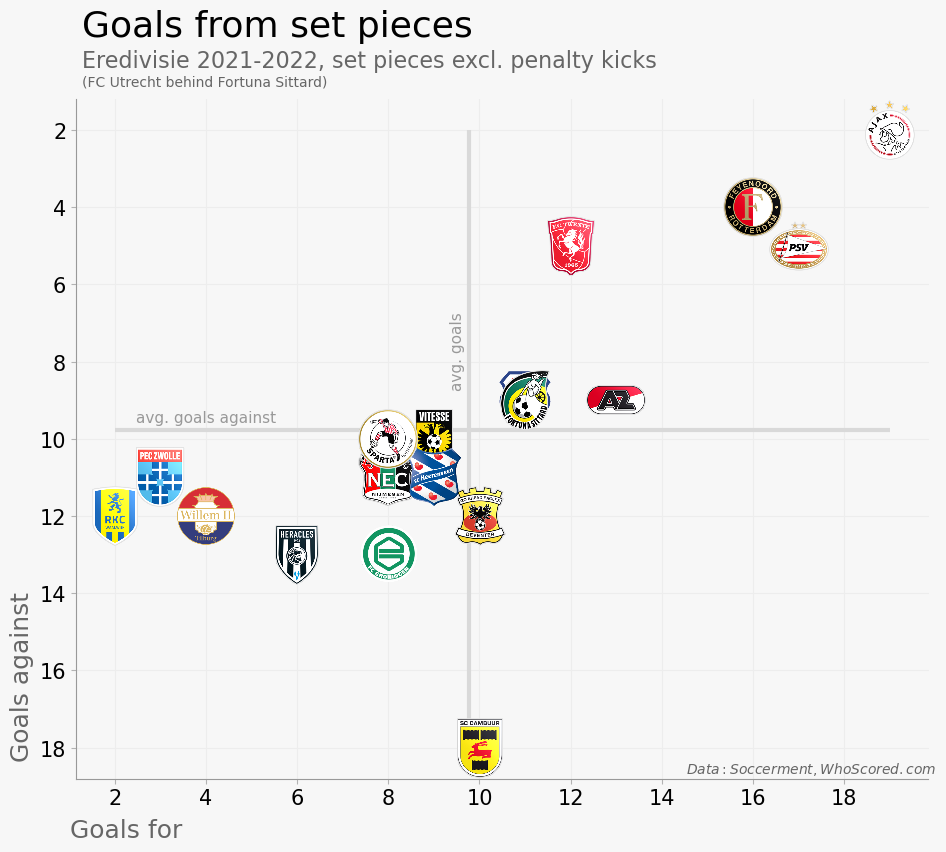

In [13]:
# print(gt.info())
#att_stp & def_stp

fig, ax1 = plt.subplots(figsize=(11,9), dpi=100)

ax1.scatter(x = gt['att_stp'],
            y = gt['def_stp'],
            color = 'white'
           )

# adding the club logos
for index, row in gt.iterrows():
    ab = AnnotationBbox(get_image(row['path']), (row['att_stp'], row['def_stp']), frameon=False)
    ax1.add_artist(ab)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('0.6')
ax1.spines['bottom'].set_color('0.6')
ax1.tick_params(axis = 'both',
                labelsize = 15,
                color = '0.7'
               )
fig.set_facecolor('0.97')
ax1.set_facecolor('0.97')

from matplotlib.ticker import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.invert_yaxis()

ax1.grid(which='major', axis='both', color='0.93')

plt.hlines(gt['def_stp'].mean(), gt['att_stp'].min(), gt['att_stp'].max(), linewidth=3, color='0.85')
plt.vlines(gt['att_stp'].mean(), gt['def_stp'].min(), gt['def_stp'].max(), linewidth=3, color='0.85')

fig.text(.13, .95, 'Goals from set pieces', size=26)
fig.text(.13, .915, 'Eredivisie 2021-2022, set pieces excl. penalty kicks', size = 16, color = '0.4')
fig.text(.13, .895, '(FC Utrecht behind Fortuna Sittard)', size = 10, color = '0.4')
fig.text(.12, .06, 'Goals for', size=18, color = '0.4')
fig.text(.065, .15, 'Goals against', size=18, color='0.4', rotation=90)
fig.text(.68, .131, '$\it{Data: Soccerment, WhoScored.com}$', size=10, color='0.4')
fig.text(.18, .521, 'avg. goals against', size=11, color='0.6')
fig.text(.465, .56, 'avg. goals', size=11, color='0.6', rotation=90)

##### 4.2 Goals For and % From Set Pieces

Text(0.365, 0.37, 'avg. goals')

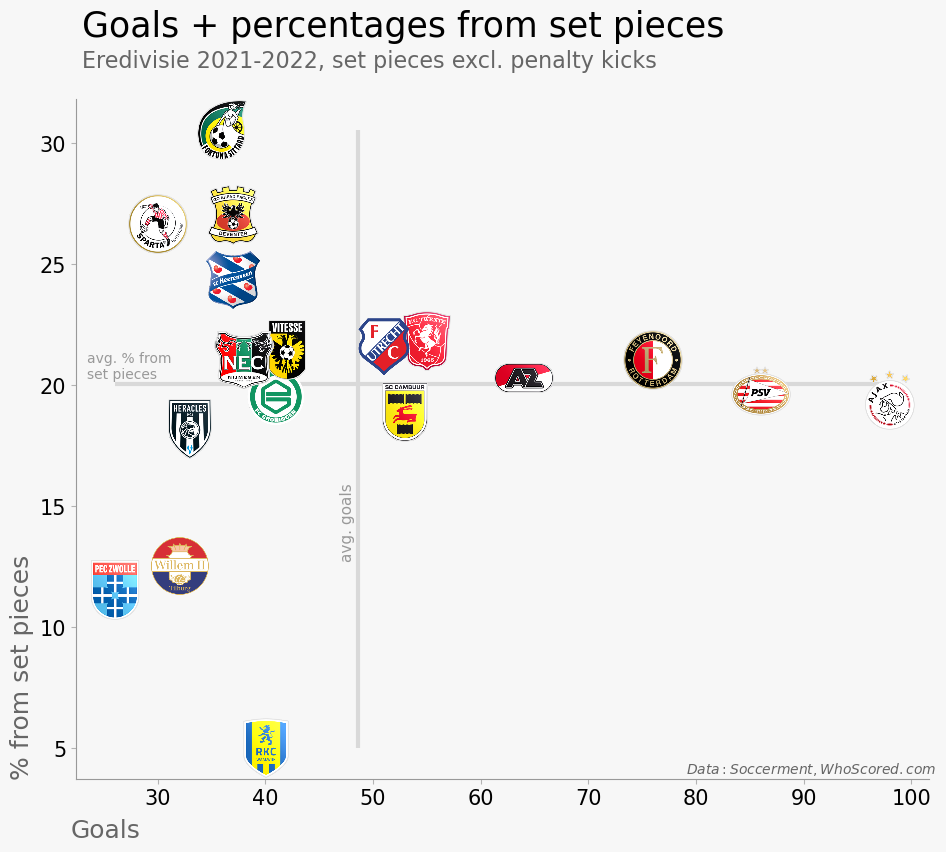

In [12]:
fig, ax2 = plt.subplots(figsize=(11,9), dpi=100)

ax2.scatter(x = gt['gf'],
            y = gt['gf_sp'],
            color = 'white'
           )

# adding the club logos
for index, row in gt.iterrows():
    ab = AnnotationBbox(get_image(row['path']), (row['gf'], row['gf_sp']), frameon=False)
    ax2.add_artist(ab)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('0.6')
ax2.spines['bottom'].set_color('0.6')
ax2.tick_params(axis = 'both',
                labelsize = 15,
                color = '0.7'
               )
fig.set_facecolor('0.97')
ax2.set_facecolor('0.97')

# ax2.grid(which='major', axis='both', color='0.93')

plt.hlines(gt['gf_sp'].mean(), gt['gf'].min(), gt['gf'].max(), linewidth=3, color='0.85')
plt.vlines(gt['gf'].mean(), gt['gf_sp'].min(), gt['gf_sp'].max(), linewidth=3, color='0.85')

fig.text(.13, .95, 'Goals + percentages from set pieces', size=25)
fig.text(.13, .915, 'Eredivisie 2021-2022, set pieces excl. penalty kicks', size = 16, color = '0.4')
fig.text(.12, .06, 'Goals', size=18, color = '0.4')
fig.text(.065, .13, '% from set pieces', size=18, color='0.4', rotation=90)
fig.text(.68, .131, '$\it{Data: Soccerment, WhoScored.com}$', size=10, color='0.4')
fig.text(.135, .57, 'avg. % from\nset pieces', size=10, color='0.6')
fig.text(.365, .37, 'avg. goals', size=11, color='0.6', rotation=90)

##### 4.3 Goals Against and % From Set Pieces

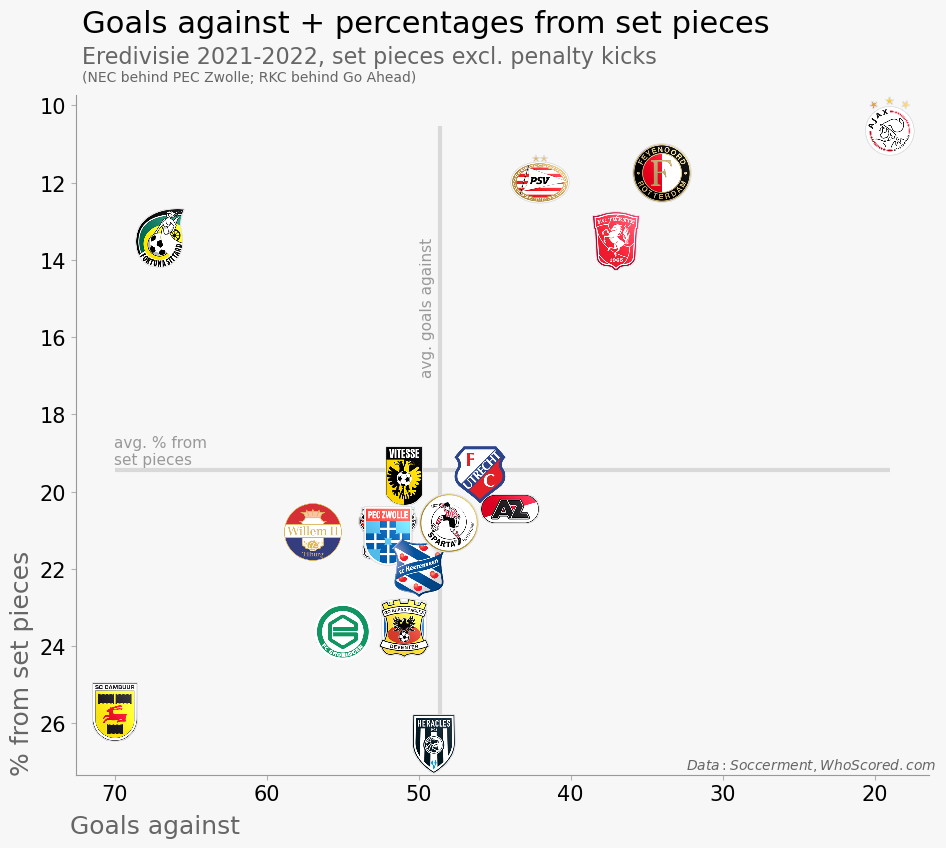

In [9]:
fig, ax3 = plt.subplots(figsize=(11,9), dpi=100)

ax3.scatter(x = gt['ga'],
            y = gt['ga_sp'],
            color = 'white'
           )

# adding the club logos
for index, row in gt.iterrows():
    ab = AnnotationBbox(get_image(row['path']), (row['ga'], row['ga_sp']), frameon=False)
    ax3.add_artist(ab)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color('0.6')
ax3.spines['bottom'].set_color('0.6')
ax3.tick_params(axis = 'both',
                labelsize = 15,
                color = '0.7'
               )
fig.set_facecolor('0.97')
ax3.set_facecolor('0.97')
ax3.invert_yaxis()
ax3.invert_xaxis()

# ax3.grid(which='major', axis='both', color='0.93')

fig.text(.13, .95, 'Goals against + percentages from set pieces', size=22)
fig.text(.13, .915, 'Eredivisie 2021-2022, set pieces excl. penalty kicks', size = 16, color = '0.4')
fig.text(.13, .895, '(NEC behind PEC Zwolle; RKC behind Go Ahead)', size = 10, color = '0.4')
fig.text(.12, .06, 'Goals against', size=18, color = '0.4')
fig.text(.065, .13, '% from set pieces', size=18, color='0.4', rotation=90)
fig.text(.68, .131, '$\it{Data: Soccerment, WhoScored.com}$', size=10, color='0.4')
fig.text(.16, .47, 'avg. % from\nset pieces', size=11, color='0.6')
fig.text(.438, .57, 'avg. goals against', size=11, color='0.6', rotation=90)

plt.hlines(gt['ga_sp'].mean(), gt['ga'].min(), gt['ga'].max(), linewidth=3, color='0.85')
plt.vlines(gt['ga'].mean(), gt['ga_sp'].min(), gt['ga_sp'].max(), linewidth=3, color='0.85')

ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

#### 4.4 Percentages GF and GA From Set Pieces

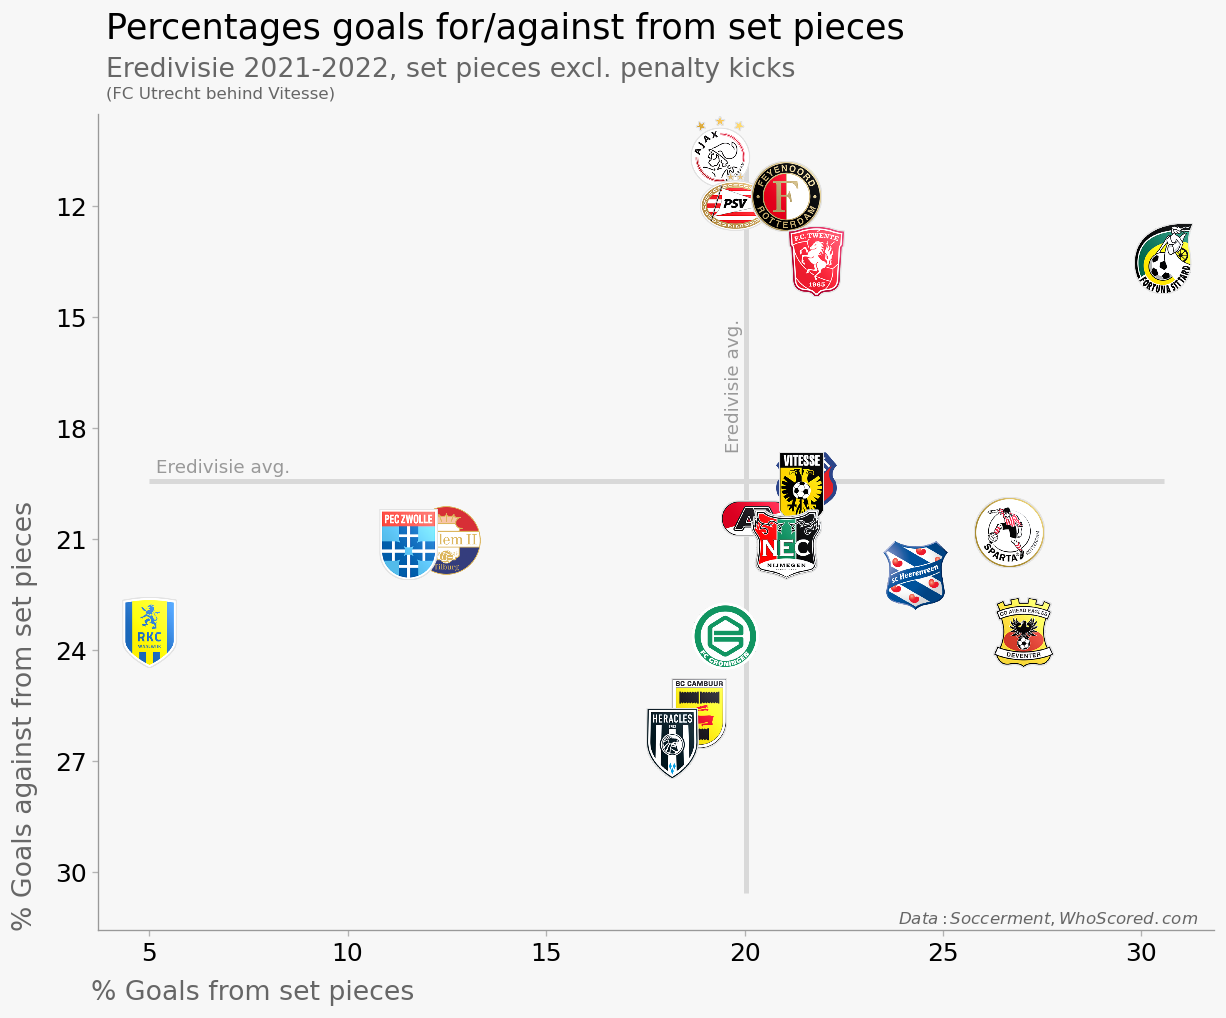

In [10]:
fig, ax4 = plt.subplots(figsize=(12,9), dpi=120)

ax4.scatter(x = gt['gf_sp'],
            y = gt['ga_sp'],
            color = 'white'
           )

for index, row in gt.iterrows():
    ab = AnnotationBbox(get_image(row['path']), (row['gf_sp'], row['ga_sp']), frameon=False)
    ax4.add_artist(ab)
    
ax4.invert_yaxis()
fig.set_facecolor('0.97')
ax4.set_facecolor('0.97')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_color('0.6')
ax4.spines['bottom'].set_color('0.6')
ax4.tick_params(axis = 'both',
                labelsize = 15,
                color = '0.7'
               )

fig.text(.13, .95, 'Percentages goals for/against from set pieces', size=21)
fig.text(.13, .915, 'Eredivisie 2021-2022, set pieces excl. penalty kicks', size = 16, color = '0.4')
fig.text(.13, .895, '(FC Utrecht behind Vitesse)', size = 10, color = '0.4')
fig.text(.12, .06, '% Goals from set pieces', size=16, color = '0.4')
fig.text(.065, .13, '% Goals against from set pieces', size=16, color='0.4', rotation=90)
fig.text(.68, .131, '$\it{Data: Soccerment, WhoScored.com}$', size=10, color='0.4')
fig.text(.165, .548, 'Eredivisie avg.', size=11, color='0.6')
fig.text(.56, .57, 'Eredivisie avg.', size=11, color='0.6', rotation=90)

plt.hlines(gt['ga_sp'].mean(), gt['gf_sp'].min(), gt['gf_sp'].max(), linewidth=3, color='0.85')
plt.vlines(gt['gf_sp'].mean(), gt['gf_sp'].max(), gt['ga_sp'].min(), linewidth=3, color='0.85')

ax4.yaxis.set_major_locator(MaxNLocator(integer=True))

### 5. Analysis

In this project we have created four plots that show how Dutch Eredivise teams performed in terms of set pieces in the season 2021-22. The first plot showed the number of goals scored and conceded from set pieces. With Ajax, Feyenoord and PSV in the top right of the figure and the lower ranked clubs near the bottom left, this plot did not produce very interesting insights. The following two plots then visualized not only the number of goals scored or conceded in absolute numbers, but also the share of these goals from teams' total numbers. This already produced a more interesting story: the traditional top-3 (Ajax, Feyenoord and PSV) have been average in scoring goals from set pieces, but very strong in defending them, as shown by their low percentages of goals conceded from set pieces. We also observe that Fortuna Sittard is performing remarkably well in both aspects. Finally, the last graph plots the performance of teams purely in percentages. This is probably the best metric to analyze the teams' set piece performance, as it isolates their performance in set pieces from their overall performance. For instance, teams like Ajax and Feyenoord may dominate most of their opponents in open play, which may result in more set piece opportunities and consequently more set piece goals from open play. This by-effect is largely evened out by only looking at the percentual outcomes of set pieces. As expected, the last plot shows that Fortuna Sittard has been very efficient both in defending and scoring from set pieces. The top-3 performs averagely in scoring from set pieces, but excel in defending them. We also observe that three of the worst performing teams ended up relegating from the Eredivisie. These are PEC Zwolle, Willem II and Heracles Almelo. Interestingly, the worst performing team in terms of set pieces - RKC Waalwijk - managed to stay up.